In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = sns.load_dataset('tips')

In [3]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df1['SQRT TB'] = np.sqrt(df1['total_bill'])
df1['LOG TB'] = np.log(df1['total_bill'])

In [5]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,3.202340


In [7]:
print('Skewness of Original Total Bill column',df1['total_bill'].skew())
print('Skewness of SQRT transformed Total Bill column',df1['SQRT TB'].skew())
print('Skewness of Log transformed Total Bill column',df1['LOG TB'].skew())

Skewness of Original Total Bill column 1.1332130376158205
Skewness of SQRT transformed Total Bill column 0.5661281592596766
Skewness of Log transformed Total Bill column -0.11623079290253824


In [8]:
print('Kurtosis of Original Total Bill column',df1['total_bill'].kurt())
print('Kurtosis of SQRT transformed Total Bill column',df1['SQRT TB'].kurt())
print('Kurtosis of Log transformed Total Bill column',df1['LOG TB'].kurt())

Kurtosis of Original Total Bill column 1.2184840156638854
Kurtosis of SQRT transformed Total Bill column 0.19520953466627722
Kurtosis of Log transformed Total Bill column 0.4734793671474513


/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


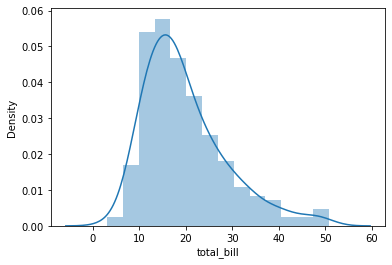

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


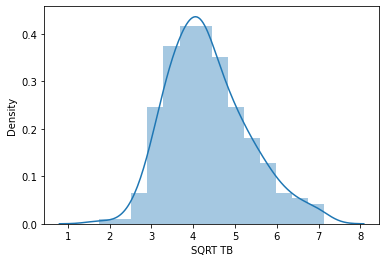

/Users/aniruddhakalbande/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


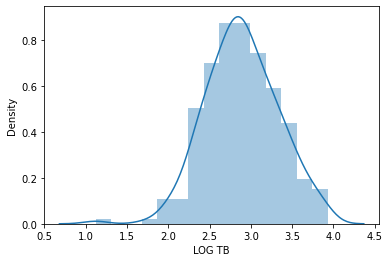

In [9]:
sns.distplot(df1['total_bill'])
plt.show()
sns.distplot(df1['SQRT TB'])
plt.show()
sns.distplot(df1['LOG TB'])
plt.show()

# Handling Categorical Data

## Label Encoding

In [12]:
df1['Sex LE1'] = df1['sex'].replace({'Male':1,'Female':0})
df1['Sex LE2'] = df1['sex'].map({'Male':1,'Female':0})

In [13]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB,Sex LE1,Sex LE2
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,2.832625,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,2.336020,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,3.044999,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,3.164631,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,3.202340,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
LE = LabelEncoder()

In [16]:
df1['day LE'] = LE.fit_transform(df1['day'])

In [17]:
df1.tail()

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB,Sex LE1,Sex LE2,day LE
239,29.03,5.92,Male,No,Sat,Dinner,3,5.387950,3.368330,1,1,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,5.213444,3.302481,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,4.761302,3.121042,1,1,1
242,17.82,1.75,Male,No,Sat,Dinner,2,4.221374,2.880321,1,1,1
243,18.78,3.00,Female,No,Thur,Dinner,2,4.333590,2.932792,0,0,3


In [18]:
print(df1['day'].unique())
print(df1['day LE'].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']
[2 1 3 0]


# One Hot Encoding

In [19]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size,SQRT TB,LOG TB,Sex LE1,Sex LE2,day LE
0,16.99,1.01,Female,No,Sun,Dinner,2,4.121893,2.832625,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,3.215587,2.336020,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,4.583667,3.044999,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,4.866210,3.164631,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,4.958831,3.202340,0,0,2


In [21]:
pd.get_dummies(df1['day']).tail()

,Thur,Fri,Sat,Sun
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0
243,1,0,0,0


In [22]:
pd.get_dummies(df1['sex']).head()

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
pd.get_dummies(df1['sex'],drop_first=True).head()

,Female
0,1
1,0
2,0
3,0
4,1


In [24]:
pd.get_dummies(df1['day'],drop_first=True).head()

,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [25]:
pd.get_dummies(data=df1,columns=['day']).head()

,total_bill,tip,sex,smoker,time,size,SQRT TB,LOG TB,Sex LE1,Sex LE2,day LE,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,4.121893,2.832625,0,0,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,3.215587,2.336020,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,4.583667,3.044999,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,4.866210,3.164631,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,4.958831,3.202340,0,0,2,0,0,0,1


In [26]:
pd.get_dummies(data=df1,columns=['day'],drop_first=True).head()

,total_bill,tip,sex,smoker,time,size,SQRT TB,LOG TB,Sex LE1,Sex LE2,day LE,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,4.121893,2.832625,0,0,2,0,0,1
1,10.34,1.66,Male,No,Dinner,3,3.215587,2.336020,1,1,2,0,0,1
2,21.01,3.50,Male,No,Dinner,3,4.583667,3.044999,1,1,2,0,0,1
3,23.68,3.31,Male,No,Dinner,2,4.866210,3.164631,1,1,2,0,0,1
4,24.59,3.61,Female,No,Dinner,4,4.958831,3.202340,0,0,2,0,0,1


In [27]:
pd.get_dummies(data=df1,columns=['sex'],drop_first=True).head()

,total_bill,tip,smoker,day,time,size,SQRT TB,LOG TB,Sex LE1,Sex LE2,day LE,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,4.121893,2.832625,0,0,2,1
1,10.34,1.66,No,Sun,Dinner,3,3.215587,2.336020,1,1,2,0
2,21.01,3.50,No,Sun,Dinner,3,4.583667,3.044999,1,1,2,0
3,23.68,3.31,No,Sun,Dinner,2,4.866210,3.164631,1,1,2,0
4,24.59,3.61,No,Sun,Dinner,4,4.958831,3.202340,0,0,2,1


In [28]:
pd.get_dummies(data=df1,columns=['sex','day','time','smoker'],drop_first=True).head()

,total_bill,tip,size,SQRT TB,LOG TB,Sex LE1,Sex LE2,day LE,sex_Female,day_Fri,day_Sat,day_Sun,time_Dinner,smoker_No
0,16.99,1.01,2,4.121893,2.832625,0,0,2,1,0,0,1,1,1
1,10.34,1.66,3,3.215587,2.336020,1,1,2,0,0,0,1,1,1
2,21.01,3.50,3,4.583667,3.044999,1,1,2,0,0,0,1,1,1
3,23.68,3.31,2,4.866210,3.164631,1,1,2,0,0,0,1,1,1
4,24.59,3.61,4,4.958831,3.202340,0,0,2,1,0,0,1,1,1


# Bivariate and Multivariate Analysis

## 1. Num to Num

* Line Graph
* Scatter plot
* Jointplot
* Lmplot

# 1 . Line Graph - Seasonility / Trend 

In [30]:
x = np.arange(1,13)
positives = np.random.randint(1000,10000,12)

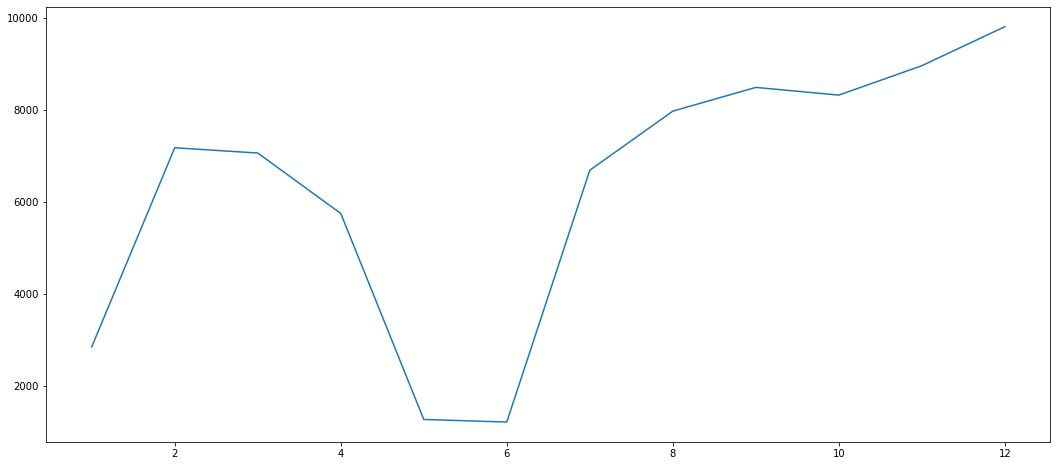

In [31]:
plt.figure(figsize=(18,8))
plt.plot(x,positives)
plt.show()

In [32]:
deaths = np.random.randint(1000,6000,12)

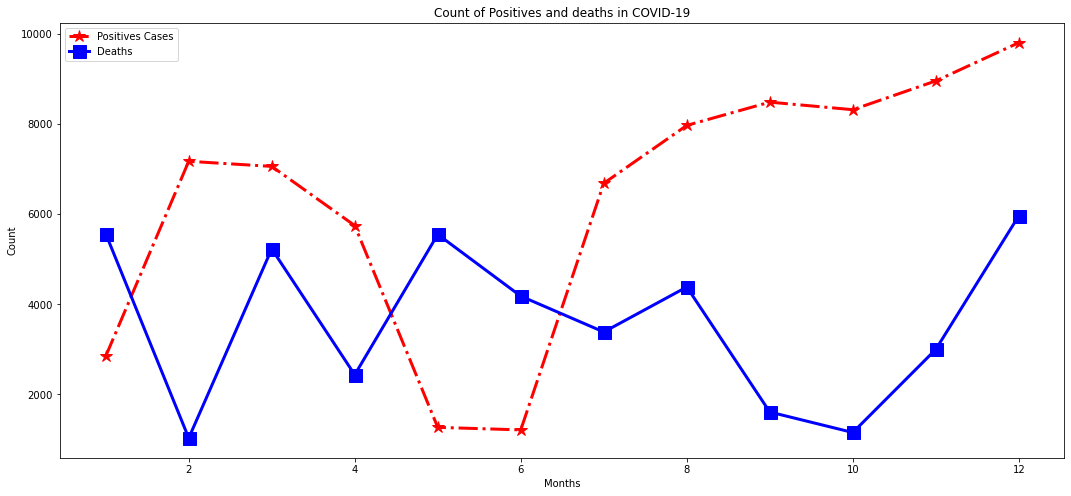

In [37]:
plt.figure(figsize=(18,8))
plt.plot(x,positives,label='Positives Cases',color='red',linestyle='-.',linewidth=3,marker='*',markersize=13)
plt.plot(x,deaths,label='Deaths',color='blue',linewidth=3,marker='s',markersize=13)
plt.legend()
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Count of Positives and deaths in COVID-19')
plt.show()

In [38]:
df1 = sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter Plot - Relation between 2 features, change of 1 over another.

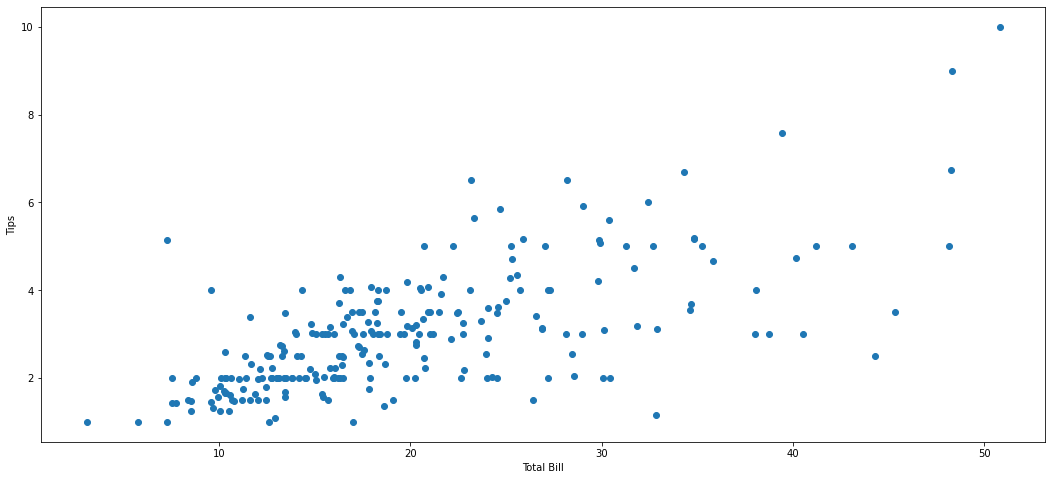

In [41]:
plt.figure(figsize=(18,8))
plt.scatter(df1['total_bill'],df1['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.show()

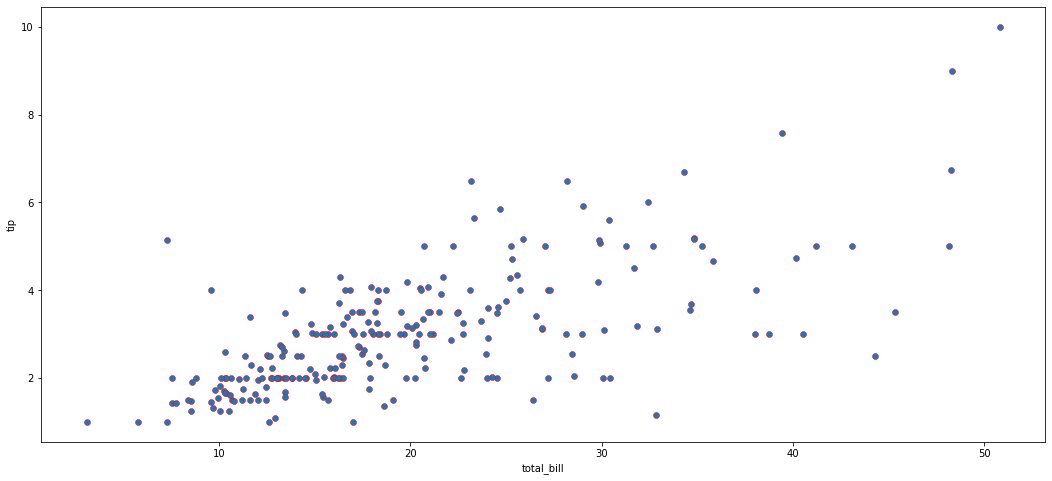

In [44]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df1,x='total_bill',y='tip',edgecolor='red')
plt.show()

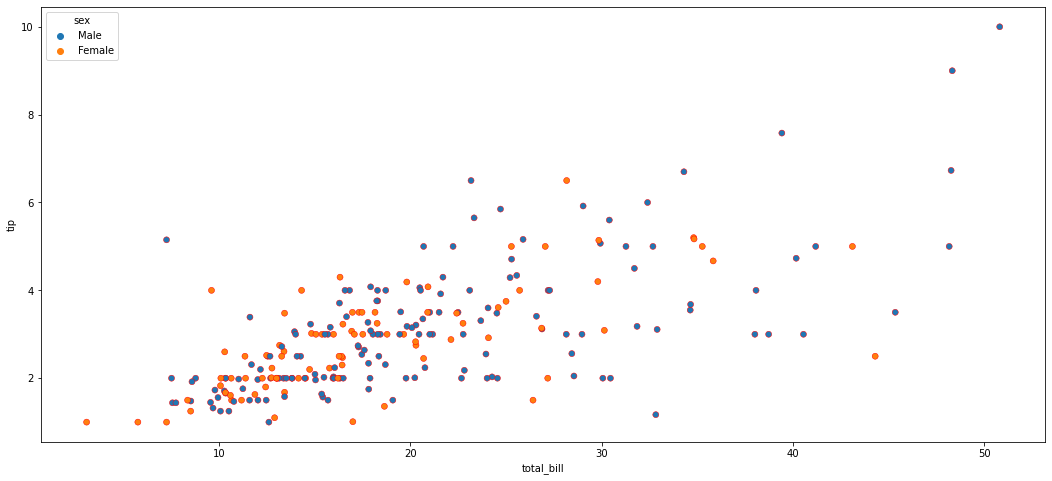

In [45]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df1,x='total_bill',y='tip',edgecolor='red',hue='sex')
plt.show()

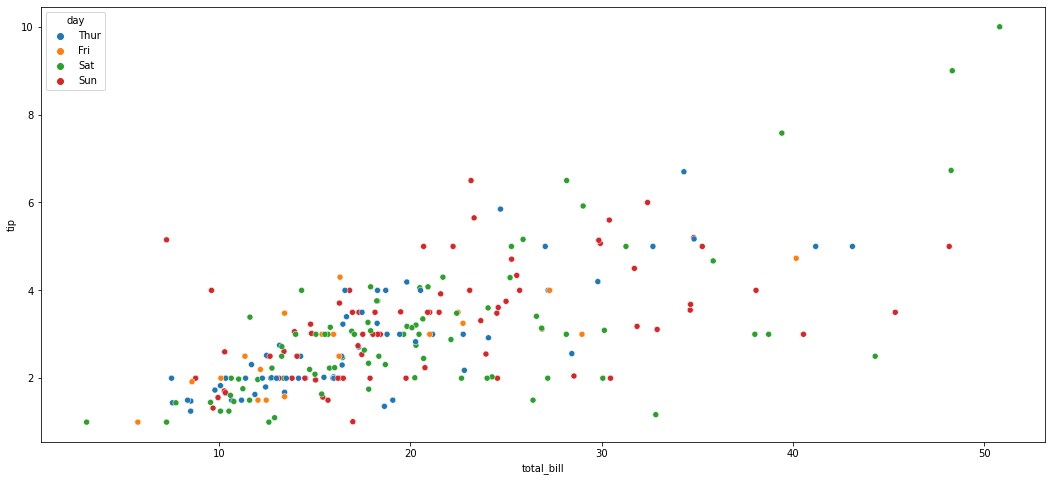

In [47]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=df1,x='total_bill',y='tip',hue='day')
plt.show()

# Jointplot  - Histogram + Scatter plot

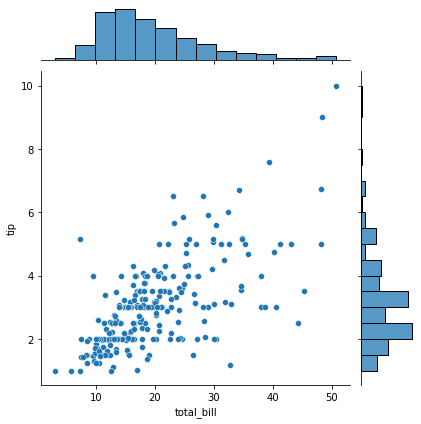

In [48]:
sns.jointplot(x='total_bill',y='tip',data=df1)
plt.show()

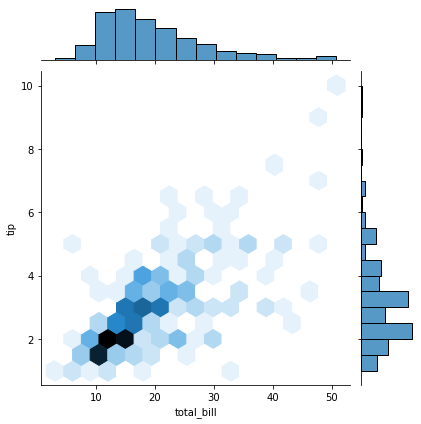

In [49]:
sns.jointplot(x='total_bill',y='tip',data=df1,kind='hex')
plt.show()

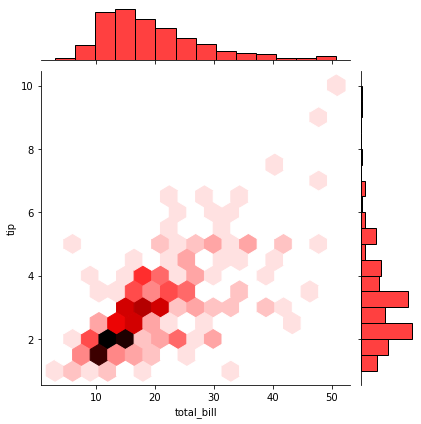

In [50]:
sns.jointplot(x='total_bill',y='tip',data=df1,kind='hex',color='red')
plt.show()

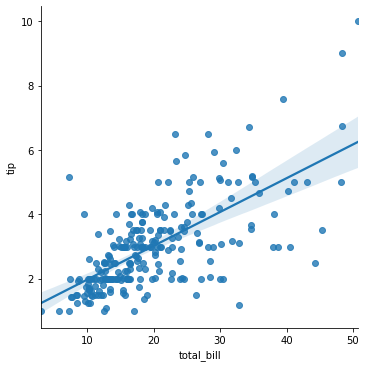

In [53]:
sns.lmplot(data=df1,x='total_bill',y='tip') # Show's the best fir line on the data.
plt.show()

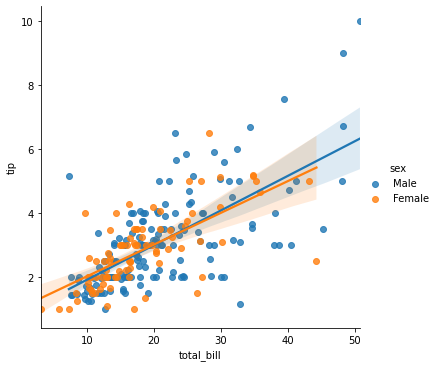

In [54]:
sns.lmplot(data=df1,x='total_bill',y='tip',hue='sex')
plt.show()

# 2 Numerical to Categorical Plots

1. Bar Graph
2. Boxplot
3. Violin Plot
4. Stripplot
5. Swarm plot

# 1. Bar Graph

In [57]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
df1.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

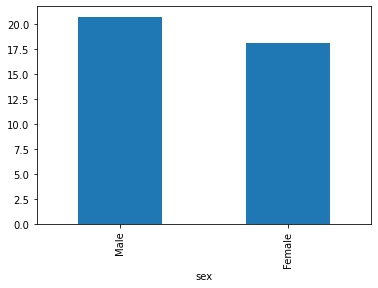

In [59]:
df1.groupby('sex')['total_bill'].mean().plot(kind='bar')
plt.show()

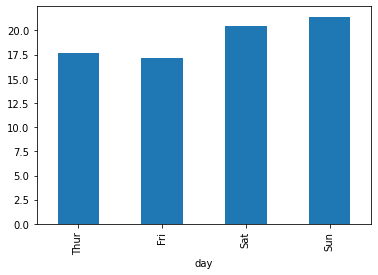

In [60]:
df1.groupby('day')['total_bill'].mean().plot(kind='bar')
plt.show()

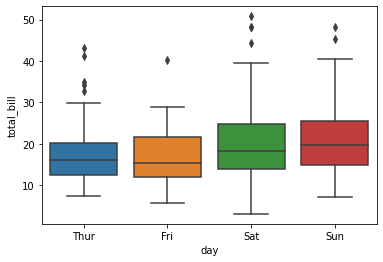

In [62]:
sns.boxplot(data=df1,x='day',y='total_bill')
plt.show()

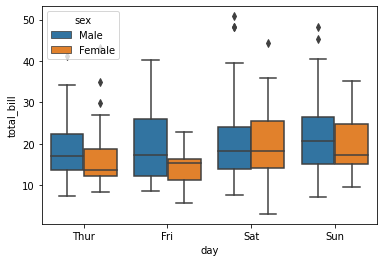

In [63]:
sns.boxplot(data=df1,x='day',y='total_bill',hue='sex')
plt.show()

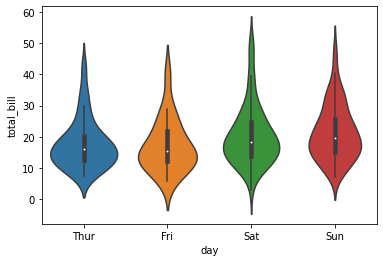

In [65]:
sns.violinplot(data=df1,x='day',y='total_bill') # Combination of Density plot and boxplot
plt.show()

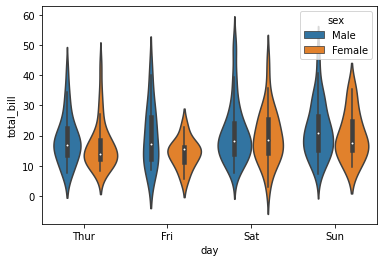

In [67]:
sns.violinplot(x='day',y='total_bill',data=df1,hue='sex')
plt.show()

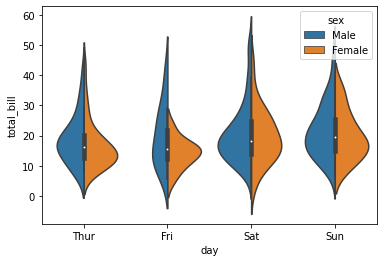

In [68]:
sns.violinplot(x='day',y='total_bill',data=df1,hue='sex',split=True)
plt.show()

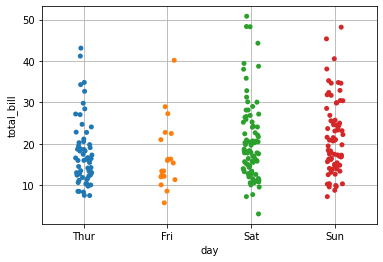

In [71]:
sns.stripplot(data=df1,x='day',y='total_bill')
plt.grid()
plt.show()

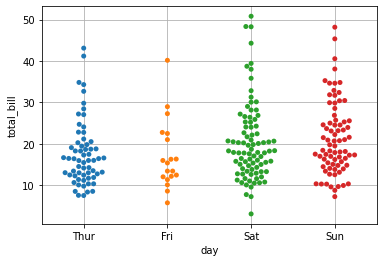

In [72]:
sns.swarmplot(data=df1,x='day',y='total_bill')
plt.grid()
plt.show()

# Categorical - Categorical Graphs

1. Side by Side Bargraph
2. Stacked Bar Graph

# Question -  What was the count of Male and Female bill payers on each day ?

In [74]:
pd.crosstab(df1['sex'],df1['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


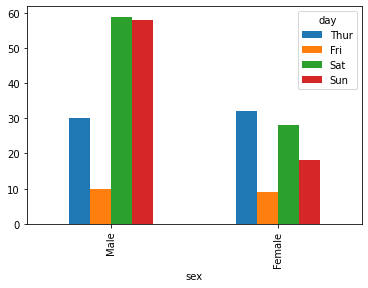

In [75]:
pd.crosstab(df1['sex'],df1['day']).plot(kind='bar')
plt.show()

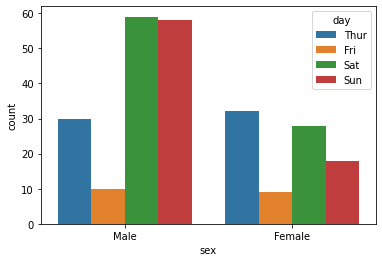

In [76]:
sns.countplot(x='sex',hue='day',data=df1)
plt.show()

In [77]:
pd.crosstab(df1['sex'],df1['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


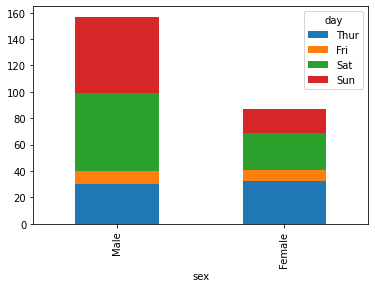

In [78]:
pd.crosstab(df1['sex'],df1['day']).plot(kind='bar',stacked=True)
plt.show()